In [40]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


h = 0.6711

def BHMassDistribution(filePathSnap1, filePathfof1, filePathSnap2, filePathfof2):
    with h5py.File(filePathSnap1, "r") as data1, \
         h5py.File(filePathSnap2, "r") as data2:

        BH_mass_dis1 = data1["PartType5/BH_Mass"][:] * 1e10 / h
        BH_mass_dis2 = data2["PartType5/BH_Mass"][:] * 1e10 / h

        plt.hist(BH_mass_dis1, color='blue', edgecolor='black', 
                 bins=np.geomspace(1e4, 1e10, 30), 
                 label='SIMBA', alpha=0.6)
             
        plt.hist(BH_mass_dis2, color='red', edgecolor='black', 
                 bins=np.geomspace(1e4, 1e10, 30), 
                 label='TNG', alpha=0.6)
             
        plt.xlabel('BH Mass (Msun)')
        plt.ylabel('Frequency')
        plt.title('BH Mass Distribution')
        plt.grid(True, linestyle='--', alpha=0.5) 
        plt.legend()
        plt.xscale("log")
        plt.yscale("log")
        
        #Tng seeds BHs losely, as long as mass is high, simba seeds BHs only in halos w/ high stellar mass

def accretionVsMstellar(filePathSnap1, filePathfof1, filePathSnap2, filePathfof2):
    with h5py.File(filePathSnap1, "r") as data1, \
         h5py.File(filePathSnap2, "r") as data2, \
         h5py.File(filePathfof1, "r") as f1, \
         h5py.File(filePathfof2, "r") as f2:
        
        total_accretion1 = f1["Subhalo/SubhaloBHMdot"][:]
        total_accretion2 = f2["Subhalo/SubhaloBHMdot"][:]
     
        BH_mass1 = f1["Subhalo/SubhaloMassType"][:, 5] * 1e10 / h
        BH_mass2 = f2["Subhalo/SubhaloMassType"][:, 5] * 1e10 / h
             
        Stellar_mass1 = f1["Subhalo/SubhaloMassType"][:, 4] * 1e10 / h
        Stellar_mass2 = f2["Subhalo/SubhaloMassType"][:, 4] * 1e10 / h

        norm = colors.LogNorm(vmin=3e5, vmax=3e8)

        fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

        # SIMBA (left)
        sc1 = axes[0].scatter(
            Stellar_mass1, total_accretion1,
            c=BH_mass1, cmap='magma', norm=norm,
            s=5, marker='o', label='SIMBA', alpha=0.8
        )
        axes[0].set_title("SIMBA")
        axes[0].set_xlabel("Subhalo Stellar Mass (Msun)")
        axes[0].set_ylabel("BH Accretion Rate (Msun/yr)")
        axes[0].set_xscale("log")
        axes[0].set_yscale("log")
        axes[0].legend()
        
        # TNG (right)
        sc2 = axes[1].scatter(
            Stellar_mass2, total_accretion2,
            c=BH_mass2, cmap='magma', norm=norm,
            s=5, marker='s', label='TNG', alpha=0.8
        )
        axes[1].set_title("TNG")
        axes[1].set_xlabel("Subhalo Stellar Mass (Msun)")
        axes[1].set_xscale("log")
        axes[1].set_yscale("log")
        axes[1].legend()
        
        # Add shared colorbar
        cbar = fig.colorbar(sc2, ax=axes.ravel().tolist(), orientation='vertical')
        cbar.set_label("Black Hole Mass (Msun)")


def subBHvsGasMass(filePathSnap1, filePathfof1, filePathSnap2, filePathfof2):
        with h5py.File(filePathSnap1, "r") as data1, \
         h5py.File(filePathSnap2, "r") as data2, \
         h5py.File(filePathfof1, "r") as f1, \
         h5py.File(filePathfof2, "r") as f2:

            BH_mass1 = f1['Subhalo/SubhaloMassType'][:, 5] * 1e10 / h
            gas_mass1 = f1['Subhalo/SubhaloMassType'][:, 0] * 1e10 / h
            
            BH_mass2 = f2['Subhalo/SubhaloMassType'][:, 5] * 1e10 / h
            gas_mass2 = f2['Subhalo/SubhaloMassType'][:, 0] * 1e10 / h
    
            plt.scatter(gas_mass1, BH_mass1, marker = 's', s = 5,  color='blue', label='SIMBA', alpha=0.6)
            plt.scatter(gas_mass2, BH_mass2, marker = 'o', s = 5, color='red', label='TNG', alpha=0.6)

             #make both runs diff shapes
            
            plt.xlabel('Subhalo Gas Mass (Msun)')
            plt.ylabel('Subhalo BH Mass (Msun)')
            plt.title('Subhalo BH Mass vs Gas Mass')
            plt.legend()
            plt.xscale("log")
            plt.yscale("log")

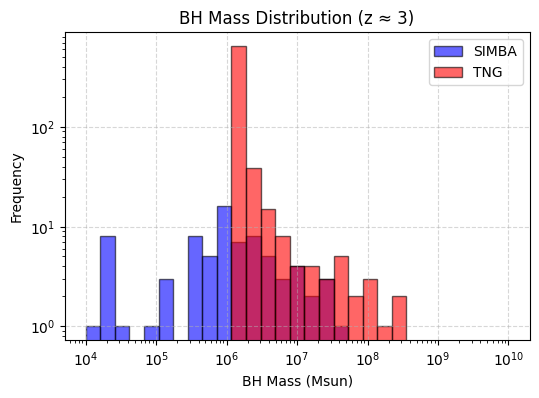

<Figure size 600x400 with 0 Axes>

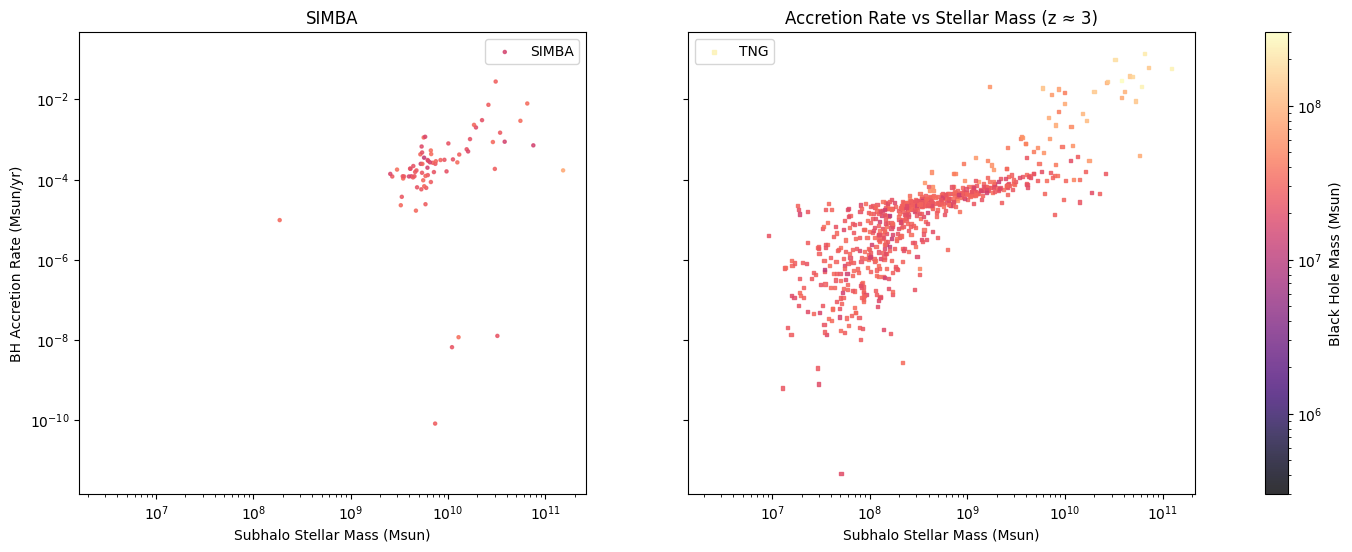

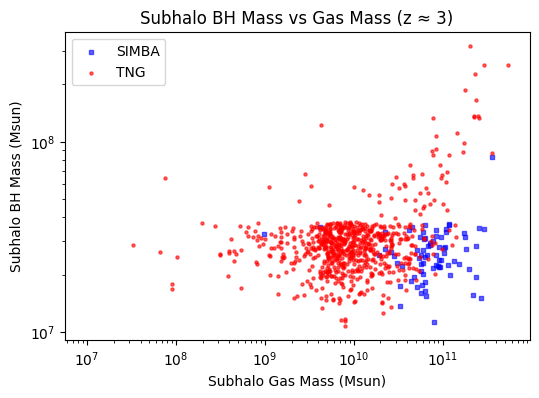

KeyError: 'Unable to synchronously open object (component not found)'

<Figure size 600x400 with 0 Axes>

In [41]:
import numpy as np
import matplotlib.pyplot as plt

snap_simba_z3 = "data/Output-simba/snap_004.hdf5"
fof_simba_z3  = "data/Output-simba/fof_subhalo_tab_004.hdf5"
snap_tng_z3   = "data/Output-fidTNG/snap_004.hdf5"
fof_tng_z3    = "data/Output-fidTNG/fof_subhalo_tab_004.hdf5"

snap_simba_z0 = "data/Output-simba/snap_032.hdf5" 
fof_simba_z0  = "data/Output-simba/snap_032.hdf5"
snap_tng_z0   = "data/Output-fidTNG/fof_subhalo_tab_032.hdf5"
fof_tng_z0    = "data/Output-fidTNG/fof_subhalo_tab_032.hdf5"

#Make sure you change z to be redshift not snapshot use snapshotds["Header"].attrs["Redshift"] 
#Can use reshift to automatically put redshifts on graphs 

# z ≃ 3 
plt.figure(figsize=(6,4))
BHMassDistribution(snap_simba_z3, fof_simba_z3, snap_tng_z3, fof_tng_z3)
plt.title("BH Mass Distribution (z ≈ 3)")
plt.show()

plt.figure(figsize=(6,4))
accretionVsMstellar(snap_simba_z3, fof_simba_z3, snap_tng_z3, fof_tng_z3)
plt.title("Accretion Rate vs Stellar Mass (z ≈ 3)")
plt.show()

plt.figure(figsize=(6,4))
subBHvsGasMass(snap_simba_z3, fof_simba_z3, snap_tng_z3, fof_tng_z3)
plt.title("Subhalo BH Mass vs Gas Mass (z ≈ 3)")
plt.show()

# z ≃ 0 
plt.figure(figsize=(6,4))
BHMassDistribution(snap_simba_z0, fof_simba_z0, snap_tng_z0, fof_tng_z0)
plt.title("BH Mass Distribution (z ≈ 0)")
plt.show()

plt.figure(figsize=(6,4))
accretionVsMstellar(snap_simba_z0, fof_simba_z0, snap_tng_z0, fof_tng_z0)
plt.title("Accretion Rate vs Stellar Mass (z ≈ 0)")
plt.show()

plt.figure(figsize=(6,4))
subBHvsGasMass(snap_simba_z0, fof_simba_z0, snap_tng_z0, fof_tng_z0)
plt.title("Subhalo BH Mass vs Gas Mass (z ≈ 0)")
plt.show()
